## Regresión lineal por gradiente descendiente

### Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
dataframe = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

In [ ]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'ModelYear', 'Origin']

raw_dataset = pd.read_csv(dataframe, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()


dataset.head(4)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,ModelYear,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1


#### Verificamos valores vacios en el dataset.

In [ ]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
ModelYear       0
Origin          0
dtype: int64

#### Eliminamos filas donde existen valores vacios.

In [ ]:
dataset = dataset.dropna(axis = 0)
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
ModelYear       0
Origin          0
dtype: int64

In [ ]:
dataset.shape

(392, 8)

#### Normalizamos los datos y creamos nuevo dataset

In [ ]:
Displacement = dataset.iloc[:, 2].values
Horsepower = dataset.iloc[:, 3].values
Weight = dataset.iloc[:, 4].values
Acceleration = dataset.iloc[:, 5].values
ModelYear = dataset.iloc[:, 6].values
Origin = dataset.iloc[:, 7].values

MPG = dataset.iloc[:, 0].values


In [ ]:
new_dataset = np.zeros((392,7))
new_dataset[:, 0] = Displacement
new_dataset[:, 1] = Horsepower
new_dataset[:, 2] = Weight
new_dataset[:, 3] = Acceleration
new_dataset[:, 4] = ModelYear
new_dataset[:, 5] = Origin
new_dataset[:, 6] = MPG
print(new_dataset[:5,:])

[[3.070e+02 1.300e+02 3.504e+03 1.200e+01 7.000e+01 1.000e+00 1.800e+01]
 [3.500e+02 1.650e+02 3.693e+03 1.150e+01 7.000e+01 1.000e+00 1.500e+01]
 [3.180e+02 1.500e+02 3.436e+03 1.100e+01 7.000e+01 1.000e+00 1.800e+01]
 [3.040e+02 1.500e+02 3.433e+03 1.200e+01 7.000e+01 1.000e+00 1.600e+01]
 [3.020e+02 1.400e+02 3.449e+03 1.050e+01 7.000e+01 1.000e+00 1.700e+01]]


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

norm_dataset = scaler.fit_transform(new_dataset)

In [ ]:
norm_dataset.shape

(392, 7)

In [ ]:
print(norm_dataset)

[[0.61757106 0.45652174 0.5361497  ... 0.         0.         0.2393617 ]
 [0.72868217 0.64673913 0.58973632 ... 0.         0.         0.15957447]
 [0.64599483 0.56521739 0.51686986 ... 0.         0.         0.2393617 ]
 ...
 [0.17312661 0.20652174 0.19336547 ... 1.         0.         0.61170213]
 [0.13436693 0.17934783 0.2869294  ... 1.         0.         0.50531915]
 [0.13178295 0.19565217 0.31386447 ... 1.         0.         0.58510638]]


### Regresión lineal simple por gradiente descendiente

In [ ]:
print('Defining independent and dependent variable')
# x = dataset[['Displacement','Horsepower','Weight']].values

x = norm_dataset[:,0] #Displacement 
# x = x.reshape(392,1)
# x = norm_dataset['Horsepower'].values

y = norm_dataset[:,6] #MPG
# y = y.reshape(392,1)

Defining independent and dependent variable


Displaying data distribution


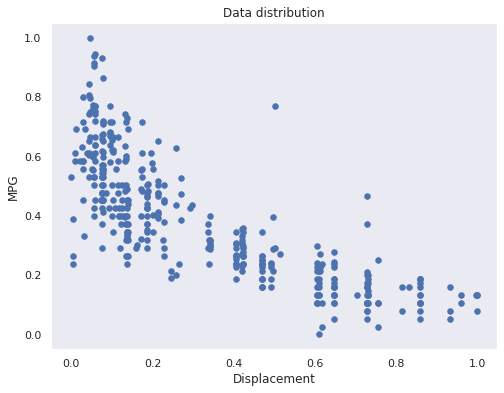

In [ ]:
print('Displaying data distribution')
plt.figure(figsize=(8,6))
plt.title('Data distribution')
plt.scatter(x, y, s=30)
plt.xlabel('Displacement')
plt.ylabel('MPG')
plt.grid()
plt.show()

In [ ]:
print('Initializing m and b')
m = 0 #theta0
b = 0 #theta1
# theta2 = 0
# theta3 = 0

Initializing m and b


In [ ]:
print('Displaying the regression line before being trained')
x_line = np.linspace(0,10,100)
y_line = b + m*x_line 
# y_line = b + theta1*x_line + theta2*x_line + theta3*x_line

Displaying the regression line before being trained


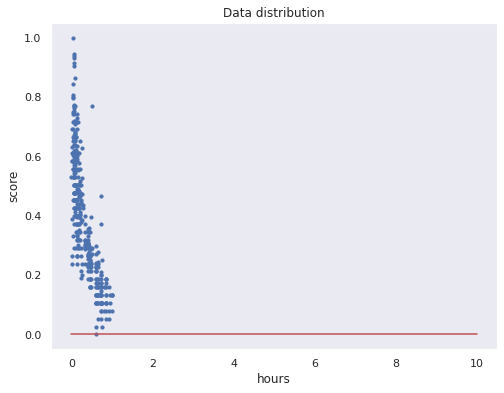

In [ ]:
plt.figure(figsize=(8,6))
plt.title('Data distribution')
plt.scatter(x, y, s=10)
plt.plot(x_line,y_line, c='r')
plt.xlabel('hours')
plt.ylabel('score')
plt.grid()
plt.show()

In [ ]:
print('Defining learning rate and the number of epochs')
L = 0.001
epochs = 15000

Defining learning rate and the number of epochs


In [ ]:
print('Train the linear regression model')
# The number of samples in the dataset

Train the linear regression model


In [ ]:
n = float(x.shape[0])

# An empty list to store the error in each epoch
losses = []
for i in range(epochs):
    yhat = m*x + b
    
    # Keeping track of the error decrease
    mse = (1/n) * np.sum((y - yhat)**2)
    losses.append(mse)
    
    # Derivatives
    dm = (-2/n) * np.sum(x * (y - yhat))
    db = (-2/n) * np.sum(y - yhat)
    
    # Values update
    m = m - L*dm   #theta0
    b = b - L*db   #theta1

Displaying linear regression line after training


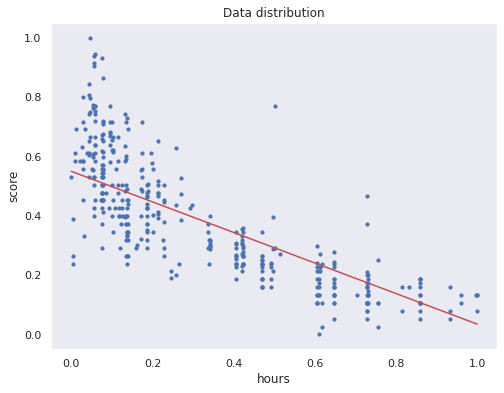

In [ ]:
print('Displaying linear regression line after training')
x_line = np.linspace(0,1,100)
y_line = m*x_line + b
plt.figure(figsize=(8,6))
plt.title('Data distribution')
plt.plot(x_line, y_line, c='r')
plt.scatter(x, y, s=10)
plt.xlabel('hours')
plt.ylabel('score')
plt.grid()
plt.show()

Displaying loss value decrease
Initial loss	: 0.1905891352976229
Final loss	: 0.015896983434311843


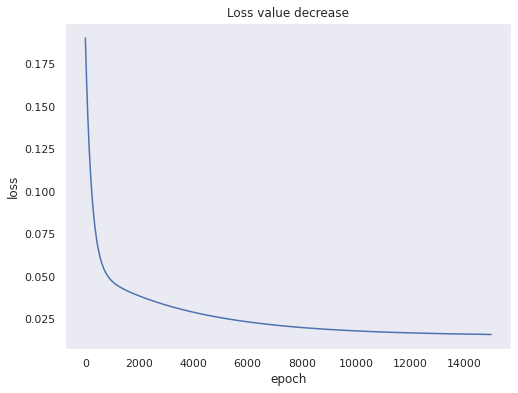

In [ ]:
print('Displaying loss value decrease')
plt.figure(figsize=(8,6))
plt.title('Loss value decrease')
plt.plot(losses)
plt.ylabel('loss')
plt.xlabel('epoch')
print('Initial loss\t:', losses[0])
print('Final loss\t:', losses[-1])
plt.grid()
plt.show()